# Hyperparameter Tuning with TensorFlow

### Introduction
Deep learning models are pivotal in pushing the boundaries in fields like image recognition and natural language processing. A crucial step in crafting these powerful models is hyperparameter tuning, which optimizes the settings that govern the training process.

### Defining Hyperparameters
`Hyperparameters` are the knobs and levers that machine learning engineers adjust before training. These parameters, which include the learning rate, batch size, number of epochs, and network architecture (e.g., number of layers and hidden units), remain fixed during training and significantly influence model performance.



### Why Tune Hyperparameters?
 
 The right hyperparameter settings can drastically improve a model’s ability to generalize from training data to unseen data. In contrast, poorly chosen hyperparameters may lead to overfitting or underfitting, thereby degrading the model’s performance on new tasks. Efficient hyperparameter tuning finds a sweet spot, balancing the model’s complexity and its learning capability.

### Hyperparameter Types and Their Impact

    Learning Rate: Dictates the adjustments made to model weights during training. Optimal settings ensure efficient convergence.

    Batch Size: Affects the model’s update frequency and convergence stability. Smaller sizes can enhance generalization but increase computation time.

    Network Architecture: More layers and units can model complex patterns but risk overfitting.

    Number of Epochs: Dictates how many times the learning algorithm will work through the entire training dataset. Too few epochs can result in an underfit model, whereas too many can lead to overfitting.
    
    Activation Functions: Functions like ReLU, sigmoid, and tanh impact the training dynamics and the model’s ability to approximate non-linear functions.

### Tuning Techniques
##### Basic Techniques

    Grid Search: Exhaustive search over a specified parameter space.
    
    Random Search: More efficient than grid search, it tests a random combination of parameters.
    
    Bayesian Optimization: Utilizes a probabilistic model to predict the best hyperparameters.

##### Advanced Techniques

    Automated Machine Learning (AutoML): Automates the selection and tuning of models, reducing the manual workload.
    
    Genetic Algorithms: Mimics natural selection to iteratively select the best model parameters.
    
    Hyperband: A resource-efficient method that speeds up the tuning process by focusing on promising parameter combinations.



I will be working on `mnist` dataset which contains digits form 0 to 9. The shape of the dataset is (6000, 9)

In [3]:
# load MNIST

from tensorflow.keras.datasets import mnist


(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(f'Xtrain shape: {x_train.shape}, ytrain shape: {y_train.shape}, xtest shape: {x_test.shape}, ytest shape: {y_test.shape}')


Xtrain shape: (60000, 28, 28), ytrain shape: (60000,), xtest shape: (10000, 28, 28), ytest shape: (10000,)


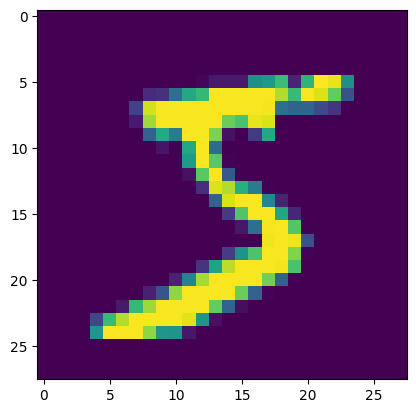

In [7]:
# Visualize first input
import matplotlib.pyplot as plt

plt.imshow(x_train[0])

So the first element is 5


In [9]:
# Create Adam Optimizer


from tensorflow.keras.optimizers import Adam

optimizer1 = Adam(learning_rate=0.001)

In [10]:
# build first model

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model_1 = Sequential([layers.Input((28,28)),
                      layers.Lambda(lambda x: x/255),
                      layers.Flatten(),
                      layers.Dense(10, activation='softmax')])

model_1.compile(optimizer = optimizer1, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_1.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=8)


Epoch 1/8


2024-07-03 15:33:48.733636: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8031 - loss: 0.7379 - val_accuracy: 0.9156 - val_loss: 0.3068
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9110 - loss: 0.3176 - val_accuracy: 0.9225 - val_loss: 0.2838
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9196 - loss: 0.2881 - val_accuracy: 0.9250 - val_loss: 0.2740
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9227 - loss: 0.2756 - val_accuracy: 0.9258 - val_loss: 0.2686
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9237 - loss: 0.2767 - val_accuracy: 0.9257 - val_loss: 0.2678
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9263 - loss: 0.2647 - val_accuracy: 0.9256 - val_loss: 0.2683
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9292 - loss: 0.2582 - val_accuracy: 0.9271 - val_loss: 0.2664
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9296 - loss: 0.2573 - val_accuracy: 0.9

In the first epoch we have val_accuracy higher than accuracy which is a littile bit weired. But as we go on we have approxmitely same number of accuracy and val_accuracy to 0.9296.  It means our model can do well on unseen data.


In second model, I'll have two dense layer, one will be `relu` and the other will be `softmax`

In [12]:
# build second model

from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

optimizer2 = Adam(learning_rate=0.001)

model_2 = Sequential([layers.Input((28,28)),
                      layers.Lambda(lambda x: x/255),
                      layers.Flatten(),
                      layers.Dense(32, activation='relu'),
                      layers.Dense(10, activation='softmax')])

model_2.compile(optimizer = optimizer2, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_2.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=8)


Epoch 1/8


2024-07-03 15:47:57.162812: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8315 - loss: 0.5936 - val_accuracy: 0.9385 - val_loss: 0.2090
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9412 - loss: 0.2033 - val_accuracy: 0.9506 - val_loss: 0.1640
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9562 - loss: 0.1552 - val_accuracy: 0.9604 - val_loss: 0.1373
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9632 - loss: 0.1268 - val_accuracy: 0.9624 - val_loss: 0.1259
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9674 - loss: 0.1102 - val_accuracy: 0.9642 - val_loss: 0.1166
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9727 - loss: 0.0936 - val_accuracy: 0.9681 - val_loss: 0.1121
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9756 - loss: 0.0825 - val_accuracy: 0.9702 - val_loss: 0.1046
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9769 - loss: 0.0784 - val_accura

You can see the imporvement in the model. Before we had `accuracy: 0.9296 ` and now we have `accuracy: 0.9769`

### Let's see what happens when increasing the learning rate.

In [13]:
optimizer3 = Adam(learning_rate=0.01)


model_3 = Sequential([layers.Input((28,28)),
                      layers.Lambda(lambda x: x/255),
                      layers.Flatten(),
                      layers.Dense(32, activation='relu'),
                      layers.Dense(10, activation='softmax')])

model_3.compile(optimizer = optimizer3, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_3.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=8)



Epoch 1/8


2024-07-03 16:04:01.568174: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.8787 - loss: 0.3984 - val_accuracy: 0.9504 - val_loss: 0.1732
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9482 - loss: 0.1812 - val_accuracy: 0.9503 - val_loss: 0.1741
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9510 - loss: 0.1669 - val_accuracy: 0.9505 - val_loss: 0.1749
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9559 - loss: 0.1458 - val_accuracy: 0.9602 - val_loss: 0.1560
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9578 - loss: 0.1399 - val_accuracy: 0.9581 - val_loss: 0.1710
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9607 - loss: 0.1362 - val_accuracy: 0.9499 - val_loss: 0.1882
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9648 - loss: 0.1212 - val_accuracy: 0.9496 - val_loss: 0.1936
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9630 - loss: 0.1219 - val_accura

There is not much difference in this model form the previous one.


### let's try using different parameters. 

In [14]:
optimizer4 = Adam(learning_rate=0.001)


model_4 = Sequential([layers.Input((28,28)),
                      layers.Lambda(lambda x: x/255),
                      layers.Flatten(),
                      layers.Dense(128, activation='relu'),
                      layers.Dense(128, activation='relu'),
                      layers.Dense(128, activation='relu'),
                      layers.Dense(10, activation='softmax')])

model_4.compile(optimizer = optimizer4, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

model_4.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=8)

Epoch 1/8


2024-07-03 16:11:01.722405: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 47040000 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 8ms/step - accuracy: 0.8786 - loss: 0.4062 - val_accuracy: 0.9627 - val_loss: 0.1159
Epoch 2/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 9ms/step - accuracy: 0.9682 - loss: 0.1025 - val_accuracy: 0.9676 - val_loss: 0.0975
Epoch 3/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9779 - loss: 0.0699 - val_accuracy: 0.9725 - val_loss: 0.0878
Epoch 4/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9830 - loss: 0.0513 - val_accuracy: 0.9774 - val_loss: 0.0754
Epoch 5/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.9866 - loss: 0.0405 - val_accuracy: 0.9770 - val_loss: 0.0833
Epoch 6/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 8ms/step - accuracy: 0.9896 - loss: 0.0326 - val_accuracy: 0.9828 - val_loss: 0.0710
Epoch 7/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9920 - loss: 0.0255 - val_accuracy: 0.9773 - val_loss: 0.0936
Epoch 8/8
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9923 - loss: 0.0249 - val_accura

The Accuracy is massivein this one.

### Add Regularization / Dropout to reduce overfitting


In [15]:
from tensorflow.keras.regularizers import L2

optimizer5 = Adam(0.001)

model_5 = Sequential([layers.Input((28, 28)),
                     layers.Lambda(lambda x: x / 255),
                     layers.Flatten(),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(128, activation='relu', kernel_regularizer=L2(0.001)),
                     layers.Dropout(0.05),
                     layers.Dense(10, activation='softmax')])

model_5.compile(optimizer=optimizer5, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_5.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10)



Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8625 - loss: 0.7556 - val_accuracy: 0.9575 - val_loss: 0.3168
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9546 - loss: 0.3208 - val_accuracy: 0.9620 - val_loss: 0.2670
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9589 - loss: 0.2669 - val_accuracy: 0.9683 - val_loss: 0.2337
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9648 - loss: 0.2412 - val_accuracy: 0.9720 - val_loss: 0.2155
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9658 - loss: 0.2324 - val_accuracy: 0.9725 - val_loss: 0.2088
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.9680 - loss: 0.2217 - val_accuracy: 0.9676 - val_loss: 0.2214
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9672 - loss: 0.2176 - val_accuracy: 0.9703 - val_loss: 0.2052
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9684 - loss: 0.21

`L2(0.001)` drives the parameter towards zero.